<a href="https://colab.research.google.com/github/djdongjae/MachineLearning/blob/main/21_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 12s 11ms/step - loss: 0.6924 - accuracy: 0.5426 - val_loss: 0.6917 - val_accuracy: 0.5736
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6899 - accuracy: 0.6094 - val_loss: 0.6880 - val_accuracy: 0.6078
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6806 - accuracy: 0.6197 - val_loss: 0.6703 - val_accuracy: 0.5430
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6366 - accuracy: 0.6607 - val_loss: 0.6145 - val_accuracy: 0.7266
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5946 - accuracy: 0.7488 - val_loss: 0.5909 - val_accuracy: 0.7430
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5706 - accuracy: 0.7581 - val_loss: 0.5653 - val_accuracy: 0.7528
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5458 - accuracy: 0.7599 - val_loss: 0.5408 - val_accuracy: 0.76

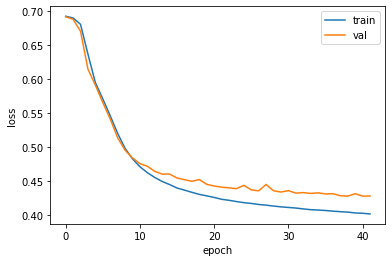

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6925 - accuracy: 0.5494 - val_loss: 0.6918 - val_accuracy: 0.6190
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6903 - accuracy: 0.6098 - val_loss: 0.6882 - val_accuracy: 0.6672
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6812 - accuracy: 0.6610 - val_loss: 0.6680 - val_accuracy: 0.6356
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6382 - accuracy: 0.6974 - val_loss: 0.6220 - val_accuracy: 0.7016
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6099 - accuracy: 0.7132 - val_loss: 0.6018 - val_accuracy: 0.7240
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5927 - accuracy: 0.7262 - val_loss: 0.5816 - val_accuracy: 0.7390
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5712 - accuracy: 0.7414 - val_loss: 0.5608 - val_accuracy: 0.748

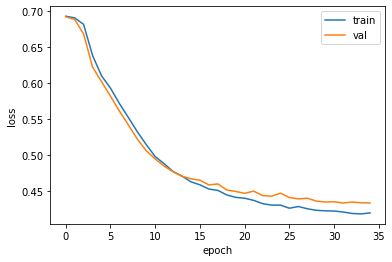

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.6923 - accuracy: 0.5454 - val_loss: 0.6912 - val_accuracy: 0.6116
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6871 - accuracy: 0.6047 - val_loss: 0.6788 - val_accuracy: 0.6204
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6571 - accuracy: 0.6530 - val_loss: 0.6263 - val_accuracy: 0.6990
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6064 - accuracy: 0.7088 - val_loss: 0.5824 - val_accuracy: 0.7318
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5709 - accuracy: 0.7311 - val_loss: 0.5533 - val_accuracy: 0.7414
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5466 - accuracy: 0.7442 - val_loss: 0.5418 - val_accuracy: 0.7302
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5238 - accuracy: 0.7552 - val_loss: 0.5132 - val_accuracy:

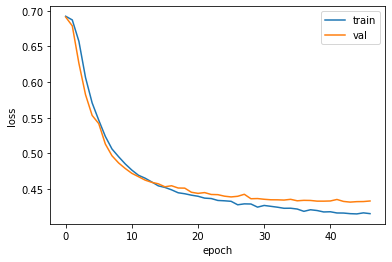

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6929 - accuracy: 0.5077 - val_loss: 0.6923 - val_accuracy: 0.5374
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6916 - accuracy: 0.5528 - val_loss: 0.6908 - val_accuracy: 0.5660
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6895 - accuracy: 0.5805 - val_loss: 0.6885 - val_accuracy: 0.5724
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6861 - accuracy: 0.5982 - val_loss: 0.6846 - val_accuracy: 0.5918
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6806 - accuracy: 0.6086 - val_loss: 0.6783 - val_accuracy: 0.6034
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6724 - accuracy: 0.6234 - val_loss: 0.6697 - val_accuracy: 0.6086
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6607 - accuracy: 0.6364 - val_loss: 0.6571 - val_accuracy: 0.62

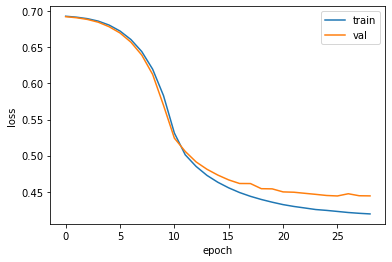

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()